In [1]:
# Insert libraries here
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

# Part 1 - Project plan

This is a guide to preparing your project plan. It functions both as a guide to the work you'll need to do and as a guide to preparing the deliverable. You can use it as a template to draft the plan report; if so, **please remove the text explanations and instructions in each section so that it reads as a coherent and continuous document**.

While you may find it useful initially to follow the outline given, you do not need to adhere to it exactly -- you're free to organize your submission in the way that seems most natural to you. However, please do keep the high-level sections, so that your report includes the following headers:

0. Background
1. Data description
2. Initial exporations
3. Planned work

Your report does not need to be long. **It should be about 2-4 pages**, and might not be much longer than this template once you replace the guiding text with your own work.



**Steps**:
1. Study the data documentation and prepared the data description.
2. Work on tidying the dataset.


---
## 0. Background

This section should introduce your reader to the general topic you're engaging with in your project and explain any specialized knowledge that they may need to understand your dataset and why it's interesting. It doesn't need to be long, but should touch on the following points:
* Introduce the topic of your project.
* What area or areas of study are you in dialogue with for your project?
* What is your data about, broadly? 
* What is the motivation for collecting the kind of data you're working with, and what sorts of things could you potentially learn?

You can look to the background sections in previous assignments for examples. (There you can also see how to include images in your notebook.) The background sections of the assignments are usually short and focused paragraphs intended to orient you to what you'll do in the assignment. They don't go into a lot of detail -- just enough to convince you that the data are interesting and explain any terminology or general information you may not know.

You may find it useful to write up the data description first, think about what the reader should know before they peek at your dataset, and then come back to the background section. My Suggestion: Write the background sections last as this is when you have a sense of what kind of information would be most useful going into the project.

<font color='orange'>The use of electricity in homes has become essential in all countries of the world. Electric power is a vital service for our lives, as well as vital for a country to grow. At the same time, electrical energy is generated mostly through the use of fossil fuels such as Coal, Gasoline, Diesel, Natural Gas, etc. These fuels generate CO2 emissions into the environment which have proven to be the main cause of global warming and pollution of the air we breathe. In recent years, the use of renewable energy has been increasingly adopted to reduce CO2 emissions.

In this project, two datasets will be used that will be related. The datasets used in this work contain information on the use of renewable energy through the years [1] and the CO2 emissions through the years [2].

In this work we want to demonstrate the direct relationship that exists between the use of renewable energy and the reduction on CO2 emissions.</font>


* [1] https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart
* [2] https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart

---
## 1. Data description

This section should introduce your dataset in detail. It should reflect your having gone through the collect/acquaint/tidy stages of the lifecycle. Below I've provided you with an outline. You do not need to adhere to this strictly -- in fact, it would be more natural to divide the items among a few short paragraphs -- but you should touch on each item in a format that suits your project.

### Basic information

Help your reader understand what your data is, where it came from, and how it can be used. Provide the following.

**General description**: provide a one- or two-sentence description of the data right at the beginning. For instance, "The data are diatom counts sampled from evenly-spaced depths in a sediment core from the gulf of California." Nothing too complicated, just something to give your reader a sense of the 'what' right off the bat.

**Source**: indicate where your data came from. Provide a verbal description -- who collected it as part of what project and where -- and either a citation or a hyperlink.

**Collection methods**: How were the data values obtained? Provide a simple description of how measurements were taken (using scientific equipment? web scraping? surveys?).

**Sampling design and scope of inference**: Indicate the relevant population. If identifiable from data documentation, state the sampling frame and sampling mechanism and indicate the scope of inference. If no information is available about the sampling design, indicate this instead, and discuss the extent to which having no scope of inference is a limitation for the particular topic you're investigating.

<font color='orange'>In this work, two datasets will be used. It has been decided to work with two datasets that are related since both have the same structure and variables.

The first dataset contains data on Renewable Energy Consumption (% of total final energy consumption) for all countries in the world and for each year from 1960 to 2021.

The second dataset contains data on CO2 Emission (tons per capita) for all countries in the world and for each year from 1960 to 2021.

Both datasets were obtained from The World Bank Data

In the case of Renewable Energy Consumption, the values ​​obtained refer to the annual average consumption of renewable energy divided by the total annual average consumption of electrical energy in each country. This value is not measured with scientific equipment, but is reported directly by electricity generating companies.

In the case of CO2 Emissions, these values ​​are obtained at the Oak Ridge National Laboratory through measurements with specialized scientific equipment for this task. These types of measurements belong to research on climate change.

Both datasets contain values grouped by country, and obtained for each year. That is, there is a value for each year and for each country. The time window used in both datasets goes from the year 1960 to 2021, for a total of 61 measurements per country, for a total of 266 countries.

</font>

### Data semantics and structure

**Units and observations**: State the observational units.

**Variable descriptions**: Provide a table of variable descriptions. If your dataset is large and you'll only work with a subset of the total available variables, limit your attention to the variables that you'll work with. Here's a template you can work with:

Name | Variable description | Type | Units of measurement
---|---|---|---
GCLASS | Graduating class | Numeric | Calendar year 


**Example rows**: Print a few example rows of your dataset in tidy format. Please don't include the codes you used to manipulate the raw data. Do that in a separate notebook and export the result to a .csv file -- `data.to_csv('tidy-data.csv')` -- to load directly into the cell below.

<font color='orange'>

**For dataset 'renewable_energy_consumption.csv'**
Name | Variable description | Type | Units of measurement
---|---|---|---
Country Name | Name of the country | String | -
Country Code | Abbreviation for country name | String | -
Indicator Name | Indicator of the variable measured | String | -
Indicator Code | Code for the variable measured | String | -
1960 to 2021 | Measurement of the variable for each year | Numeric | %

**For dataset 'co2_emissions.csv'**
Name | Variable description | Type | Units of measurement
---|---|---|---
Country Name | Name of the country | String | -
Country Code | Abbreviation for country name | String | -
Indicator Name | Indicator of the variable measured | String | -
Indicator Code | Code for the variable measured | String | -
1960 to 2021 | Measurement of the variable for each year | Numeric | tons per capita

</font>

### Note: We skip the first 4 rows for each dataset because these first 4 lines contains the source of the dataset, the date it was last updated and two blank lines

### Note 2: For each dataset, we remove the following columns: 'Country Code', 'Indicator Name' and 'Indicator Code'

### Note 3: For some countries, there is no data for the first years. These values are NaN so we will fill them with zeros

### Note 4: Both datasets contains a column named 'Unnamed: 66'. That column will be removed

In [2]:
# load tidied data and print rows
# Load the first dataset
data1 = pd.read_csv('renewable_energy_consumption.csv', skiprows = 4).drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
data1 = data1.fillna(0)
data2 = pd.read_csv('co2_emissions_tpc.csv', skiprows = 4).drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
data2 = data2.fillna(0)

In [3]:
data1.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.855900,6.889700,6.927500,6.728000,6.9946,6.6993,8.0241,0.0,0.0,0.0
1,Africa Eastern and Southern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.109554,60.468838,60.803934,61.097264,0.0000,0.0000,0.0000,0.0,0.0,0.0


In [4]:
data2.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Africa Eastern and Southern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,0.0,0.0,0.0


---
## 2. Initial explorations

At this part, you may spend most of your effort on the computing side tidying up the data. You're not expected to complete a thorough exploratory analysis, and if your dataset was especially messy to start with, you may not even begin your exploratory analysis by the time you prepare this report. You have the option to leave exploration for the Part 2 work and simply report basic properties of the dataset, but you should at minimum address the items in the 'basic properties' section below.

### Basic properties of the dataset

Help the reader get acquainted with your dataset on a simple level by identifying characteristics of the dataset and variable summaries. Some amount of code is fine here, but try to use code cells sparingly.

**Dimensions**: state the dimensions of the data (in tidy format, of course).

**Missing values**: Are there missing values? If so, why are they missing?

**Variable summaries**: Provide simple variable summaries for the most important variables in your dataset. Preferably, you'll do this for all variables, but if you have a large number, you might need to prioritize and focus on the ones most of interest. What exactly you do is a little case-specific, but think of things like means and variances, min/max, number of levels and observation counts for categorical variables, etc.

----------------------------------
* The dimensions of each dataset is 226x63, which means that there are 226 samples and 63 variables
* Yes, there were some missing values, but we filled them with zeros
* The most important variables are 'Country Code' which states the name of the country, and the other variables are named 1960 to 2021 which contains the readings of Electric Consumption and CO2 Emissions


### Exploratory analysis

If you were lucky and your dataset was neat, you should aim to include a few exploratory plots or tables here -- they don't need to be polished at this Part 1, but you should select plots that are informative (rather than including all plots you may have looked at). 

If you do include exploratory graphics or tables, please explain in a sentence or two what each one shows. Try to include a minimum of code. Consider [saving your plots as images](https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format) and inputting images into markdown cells instead of generating them anew via code cells.

<font color='orange'>
To avoid a very saturated graph, we will plot only the readings for the 'United States' for both the CO2 Emissions and Electric Consumption. With this, we only want to show an example of the type of data that each dataset contains, and take the opportunity to show that there is indeed a relationship between both variables.
</font>

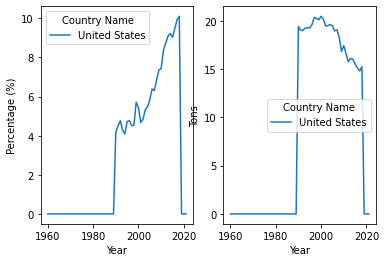

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

usa_electric = data1[data1['Country Name'] == 'United States'].set_index(['Country Name']).transpose()
usa_electric.plot(ax = axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage (%)')

usa_co2 = data2[data2['Country Name'] == 'United States'].set_index(['Country Name']).transpose()
usa_co2.plot(ax = axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Tons')

plt.show()

---
## 3. Planned work

Here you should indicate your tentative ideas for your analysis. Don't worry, these aren't final -- you can always change your mind later or shift gears if they don't pan out. The objective is to have you start thinking ahead about what you'll do.

### Questions

Please propose two focused questions that you plan to explore.

1. *Is there a clear relation between the increase of the use of Renewable Energies and the reduction of CO2 Emissions?*
2. *Which countries have adopted the higher use of Renewable Energies and which countries have the highest reductions on CO2?*

### Proposed approaches

For each question, please describe an idea or two about how you might approach the question.

1. *The use of graphs to check the trends for each Renewable Energy Use and CO2 Emissions* 
2. *The use of line graphs, bar charts, scatter, etc*

---
## Submission Checklist
1. Save file to confirm all changes are on disk
2. Run *Kernel > Restart & Run All* to execute all code from top to bottom
3. Save file again to write any new output to disk
